In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [3]:
diabdata.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [4]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
diabdata_encoded = pd.get_dummies(diabdata, columns = ['Diabetic'])
diabdata_encoded = diabdata_encoded.drop(['Diabetic_no'], axis = 1)
diabdata_encoded = diabdata_encoded.drop(['Diabetic_ no'], axis = 1)
diabdata_encoded

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic_yes
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,0
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,0
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,1
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,1
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,0
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,0


In [6]:
# checking null value
diabdata = diabdata_encoded
diabdata.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic_yes         0
dtype: int64

In [7]:
# putting 0 for null value
diabdata[['BMI', 'Pregancies', 'Pdiabetes']] = diabdata[['BMI', 'Pregancies', 'Pdiabetes']].replace(np.NaN, 0)
diabdata.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic_yes        0
dtype: int64

In [8]:
# total rows(observations) and columns(attributess)
diabdata.shape

(952, 18)

In [9]:
# summary statistics for quantiative variables
diabdata.describe()

,BMI,Sleep,SoundSleep,Pregancies,Diabetic_yes
count,952.000000,952.000000,952.000000,952.000000,952.000000
mean,25.655462,6.949580,5.495798,0.369748,0.279412
std,5.643174,1.273189,1.865618,0.892691,0.448946
min,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000,0.000000
50%,24.000000,7.000000,6.000000,0.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000,1.000000
max,45.000000,11.000000,11.000000,4.000000,1.000000


This is the end of Exploratory Data Analysis
Next part is Data Visualization

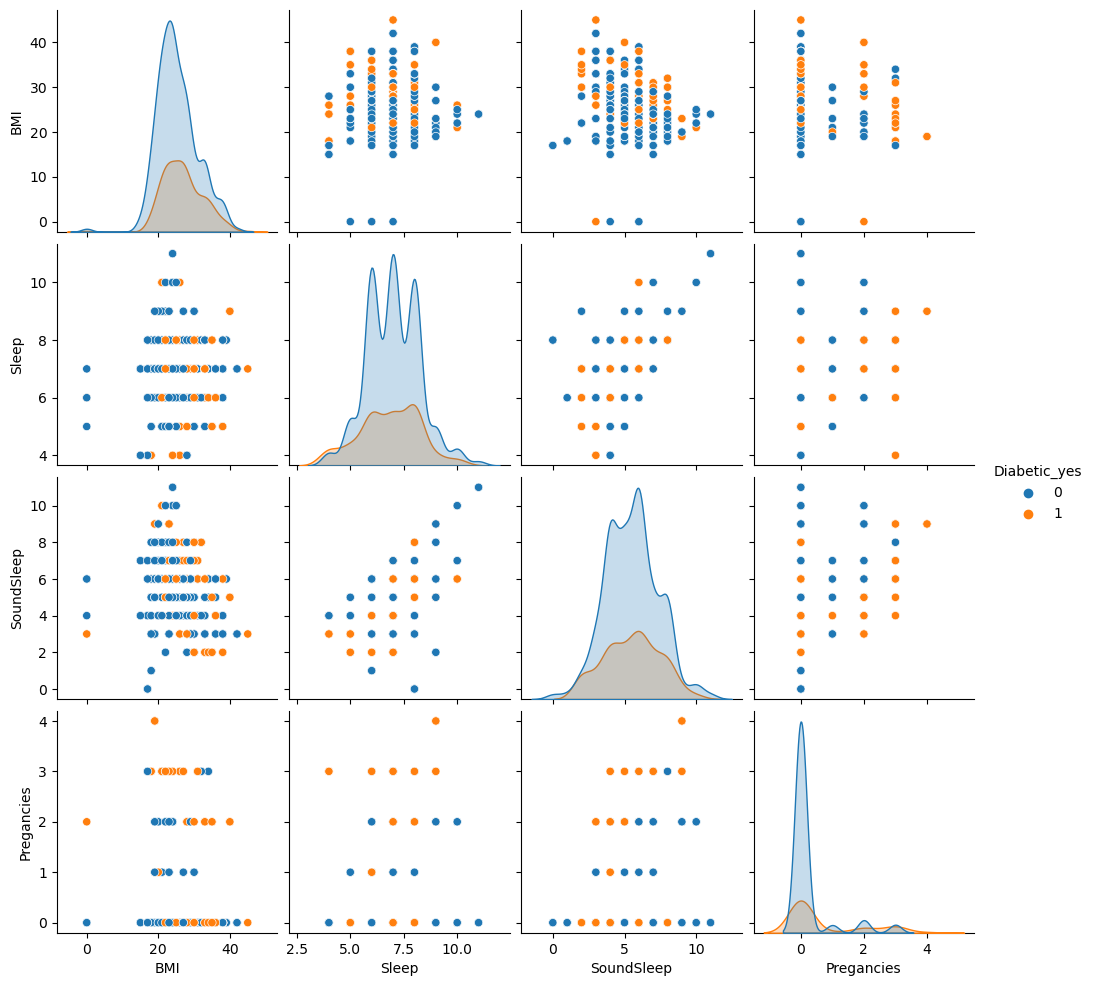

In [10]:
# pair plot
sns.pairplot(diabdata, hue = "Diabetic_yes")

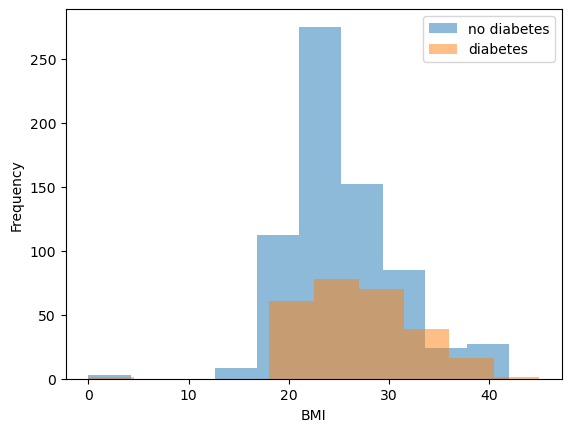

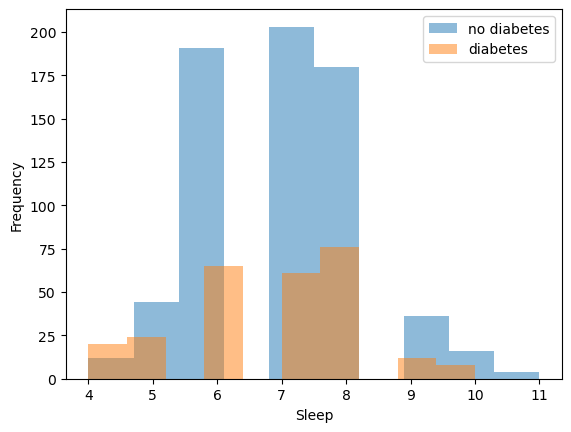

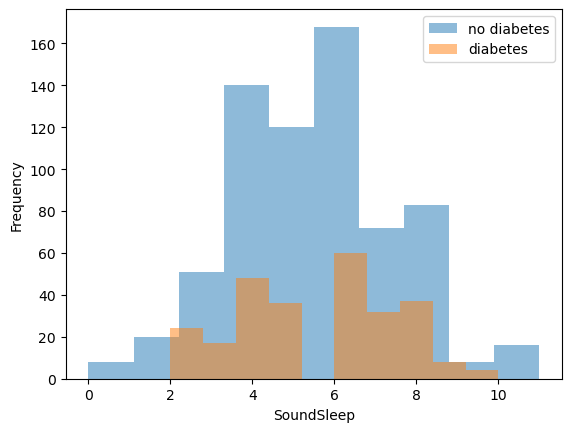

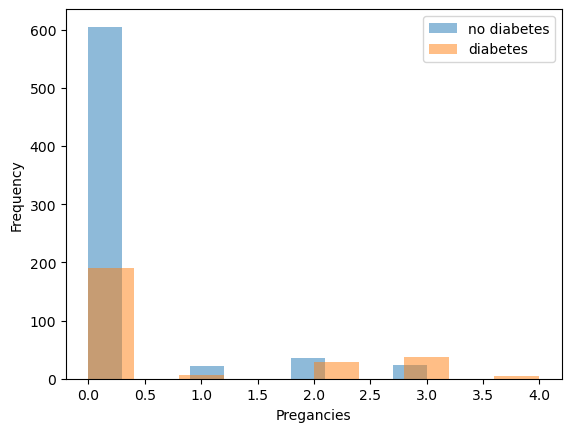

In [11]:
for col in ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']:
    plt.hist(diabdata[diabdata['Diabetic_yes'] ==  0][col], 10, alpha = 0.5, label = 'no diabetes')
    plt.hist(diabdata[diabdata['Diabetic_yes'] == 1][col], 10, alpha = 0.5, label = 'diabetes')
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Diabetic_yes', ylabel='count'>

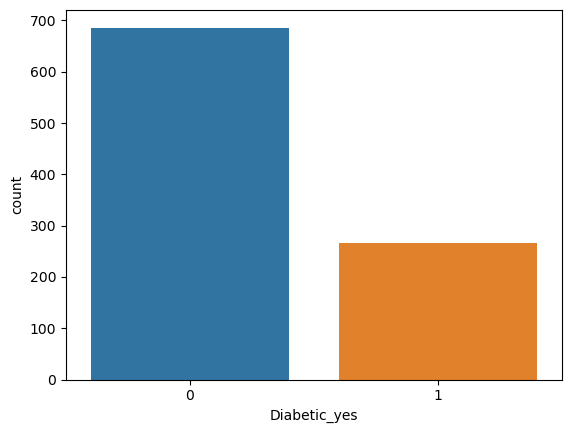

In [12]:
# Counting diabetes outcome
sns.countplot(x = 'Diabetic_yes', data = diabdata)

C:\Users\Junhee\AppData\Local\Temp\ipykernel_6540\1420040894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diabdata.corr()


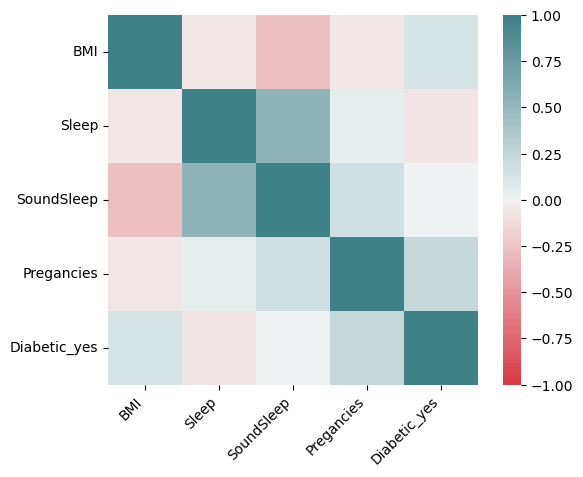

In [13]:
corr = diabdata.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [15]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [16]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102


In [17]:
# Dropping some attributes to test different classificaiton models
diabdata = diabdata.drop(['Age', 'Stress', 'Pregancies', 'highBP', 'RegularMedicine', 'Pdiabetes', 'UriationFreq'], axis = 1)
diabdata

,Gender,Family_Diabetes,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,JunkFood,BPLevel,Diabetic_yes
0,Male,no,one hr or more,39.0,no,no,8,6,occasionally,high,0
1,Male,no,less than half an hr,28.0,no,no,8,6,very often,normal,0
2,Male,no,one hr or more,24.0,no,no,6,6,occasionally,normal,0
3,Male,no,one hr or more,23.0,no,no,8,6,occasionally,normal,0
4,Male,no,less than half an hr,27.0,no,no,8,8,occasionally,normal,0
...,...,...,...,...,...,...,...,...,...,...,...
947,Male,yes,more than half an hr,25.0,no,no,8,6,often,normal,1
948,Male,yes,more than half an hr,27.0,no,no,6,5,occasionally,high,1
949,Male,no,none,23.0,no,no,6,5,occasionally,high,0
950,Male,no,less than half an hr,27.0,no,yes,6,5,occasionally,high,0


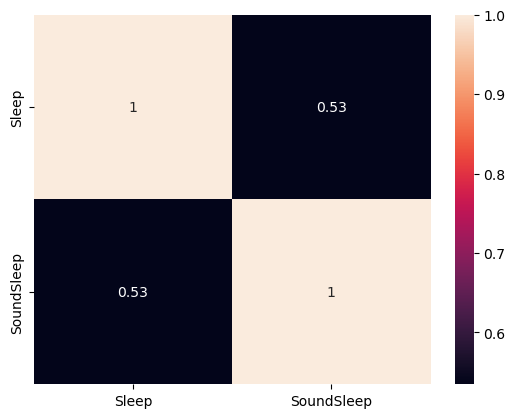

In [18]:
corr_sleep_df = diabdata[['Sleep', 'SoundSleep']] #select sleep and soundsleep
corr_sleep_mat = corr_sleep_df.corr() #correlation matrix btw two variables
sns.heatmap(corr_sleep_mat, annot=True)
plt.show()

C:\Users\Junhee\AppData\Local\Temp\ipykernel_6540\1420040894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diabdata.corr()


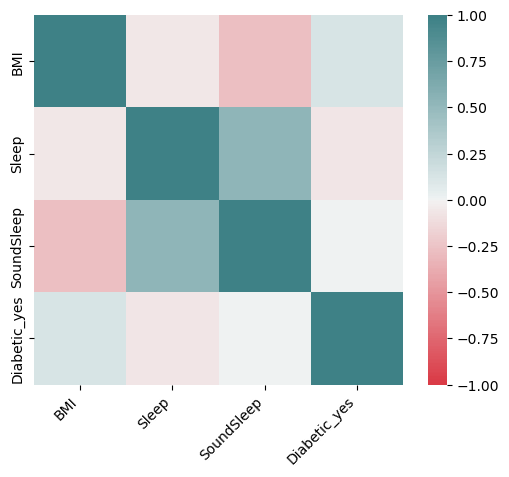

In [19]:
corr = diabdata.corr()
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
diabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            952 non-null    object 
 1   Family_Diabetes   952 non-null    object 
 2   PhysicallyActive  952 non-null    object 
 3   BMI               952 non-null    float64
 4   Smoking           952 non-null    object 
 5   Alcohol           952 non-null    object 
 6   Sleep             952 non-null    int64  
 7   SoundSleep        952 non-null    int64  
 8   JunkFood          952 non-null    object 
 9   BPLevel           952 non-null    object 
 10  Diabetic_yes      952 non-null    uint8  
dtypes: float64(1), int64(2), object(7), uint8(1)
memory usage: 75.4+ KB


In [21]:
# Naive Bayes Model
label_encode = LabelEncoder()
diabdata['Gender'] = label_encode.fit_transform(diabdata['Gender']).astype(float)
diabdata['PhysicallyActive'] = label_encode.fit_transform(diabdata['PhysicallyActive']).astype(float)
diabdata['Family_Diabetes'] = label_encode.fit_transform(diabdata['Family_Diabetes']).astype(float)
diabdata['Smoking'] = label_encode.fit_transform(diabdata['Smoking']).astype(float)
diabdata['Alcohol'] = label_encode.fit_transform(diabdata['Alcohol']).astype(float)
diabdata['JunkFood'] = label_encode.fit_transform(diabdata['JunkFood']).astype(float)
diabdata['BPLevel'] = label_encode.fit_transform(diabdata['BPLevel']).astype(float)

X = diabdata[['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']]
y = diabdata[["Diabetic_yes"]]

# split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)

naive_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8010471204188482
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       133
           1       0.74      0.53      0.62        58

    accuracy                           0.80       191
   macro avg       0.78      0.73      0.74       191
weighted avg       0.79      0.80      0.79       191

[[122  11]
 [ 27  31]]


C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
diabdata.dropna(subset = ['BMI', 'Sleep', 'SoundSleep'], inplace=True) #drops nan values from quantitative variables for now
diab_quant = diabdata[['BMI', 'Sleep', 'SoundSleep']] #the quantiative variables we want
target = diabdata['Diabetic_yes'] #the label we want to predict
lab_encoder = LabelEncoder() #encode target labels with value between 0 and n_classes-1
#split into 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(diab_quant, target, test_size = 0.2, random_state = 12)
#knn instant with 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) 
predicted = lab_encoder.fit_transform(y_pred)
true = lab_encoder.inverse_transform(y_test)
for pred, true in zip(predicted, true):
    print(f"Predicted: {pred}\tTrue: {true}")

Predicted: 1	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 1
Predicted: 0	True: 0
Predicted: 1	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 1	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 1	True: 1
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 0	True: 0
Predicted: 1	

In [23]:
true_labs = lab_encoder.inverse_transform(y_test) #there was an issue if I didn't inverse transform
predicted = predicted
conf_mat = confusion_matrix(true_labs, predicted)
conf_mat

array([[120,  13],
       [ 31,  27]], dtype=int64)

In [24]:
acc_sco = accuracy_score(true_labs, predicted)
acc_sco

0.7696335078534031

In [25]:
XMLP = diabdata.drop('Diabetic_yes', axis=1)
yMLP = diabdata['Diabetic_yes']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'relu', 
                    solver = 'adam', random_state = 12, max_iter=300)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9214659685863874

In [ ]:
from sklearn.model_selection import GridSearchCV

activations = ['relu', 'logistic', 'tanh']
solvers = ['sgd', 'adam']
max_iterations = [1000,1100,1200,1300,1400,1500]
hidden_layer_siz = [(5, 7), (7, 13), (13, 10), (12,13), (5,7,7),(10,12,13),(20,20),(12,20), (18,18),(21,21),(24,24)]
learning_rates = 0.01 * np.arange(1, 3)
batch_siz = [25, 50, 75, 100]

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations, activation = activations, solver = solvers, batch_size = batch_siz)
# set model
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)

# For Grid Search
grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X_trainMLP,y_trainMLP)
GridSearch_accuracy = grid.best_score_
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\neural_netwo

In [105]:
XMLP = diabdata.drop('Diabetic_yes', axis=1)
yMLP = diabdata['Diabetic_yes']
cat_MLP = ['Gender', 'Family_Diabetes', 'PhysicallyActive', 'Smoking', 'Alcohol', 'JunkFood', 'BPLevel']
num_MLP = ['BMI','Sleep','SoundSleep']
#encode categorical variables and scale quantitative
preprocessor_MLP = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), cat_MLP),
    ('num', StandardScaler(), num_MLP)
])
XMLP_preproc = preprocessor_MLP.fit_transform(XMLP) #apply preprocessing

#train-test 80-20
X_trainMLP, X_testMLP, y_trainMLP, y_testMLP = train_test_split(XMLP_preproc, yMLP, test_size=0.2, random_state=12)
#using standard MLPClassifier activation and solver, as well as hidden layer sizes of 100 neurons for 2 layers
mlp = MLPClassifier(hidden_layer_sizes = (18,18), activation = 'tanh', 
                    solver = 'sgd', random_state = 42, max_iter=1000, batch_size=25)

mlp.fit(X_trainMLP, y_trainMLP)
y_predMLP = mlp.predict(X_testMLP)
accMLP = np.mean(y_predMLP == y_testMLP)
accMLP

0.9581151832460733

C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Junhee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

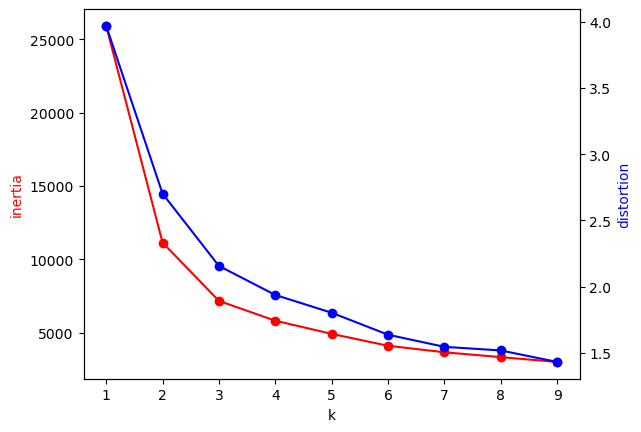

In [99]:
# finding optimal number k clusters via elbow method (k means)

distortions = [] # Sum of squared distances between samples and their closest cluster center
inertias = [] # Average of SSE between points and their assigned centroid
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)


# plot inertia and distortion
inertia = plt.subplot()
inertia.plot(K, inertias, marker='o', color='red')
inertia.set_xlabel('k')
inertia.set_ylabel('inertia',color='red')

distortion=inertia.twinx()
distortion.plot(K, distortions, color='blue', marker='o')
distortion.set_ylabel('distortion',color='blue')
plt.show()


In [106]:
# observe that distortion score line appears to become more linear at k = 3
# knn instant with n=3 neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test) 
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8167539267015707
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       133
           1       0.73      0.64      0.68        58

    accuracy                           0.82       191
   macro avg       0.79      0.77      0.78       191
weighted avg       0.81      0.82      0.81       191

[[119  14]
 [ 21  37]]


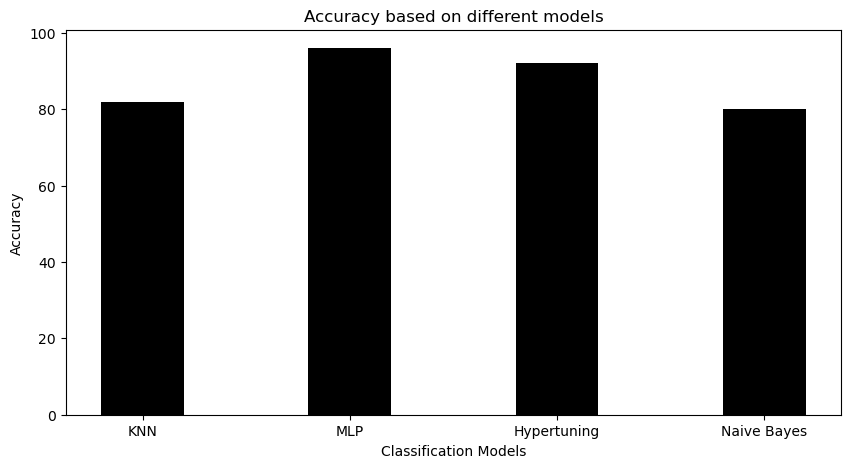

In [115]:
accuracy = {'KNN':82, 'MLP': 96, 'Hypertuning': 92, 'Naive Bayes': 80}
models = list(accuracy.keys())
percent = list(accuracy.values())

fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, percent, color ='black',
        width = 0.4)
 
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Accuracy based on different models")
plt.show()